# Week6 - Classifier Evaluation Assignment

- Complete this Jupyter Notebook.  
- Execute the initial cells and answer the numbered questions.  
- Don't import other libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

results = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/lab-evaluation-data.csv')
results.head()

,actual,prob
0,0.0,0.380052
1,1.0,0.827923
2,1.0,0.929093
3,1.0,0.472508
4,1.0,0.906988


## Data Definitions
- `actual`: Whether the event was true or not. A value of 1.0 is True and 0.0 is False.  
- `prob`: The probability that the event was True. This is estimated from a classification model.

## Question 1
- Determine the distribution of the actual event.
- Would you be concerned about bias due to imbalance?

In [2]:
#checking the value counts to see if theres any bias
results['actual'].value_counts(normalize=True) * 100

1.0    60.0
0.0    40.0
Name: actual, dtype: float64

There is a differnce between 1 and 0 values. However there is no bias as 1 is more but is not completly dominating the data 

## Question 2
- Create a histogram that shows the distribution of the probabilities for the True and False classes.  
- Describe what you observe.

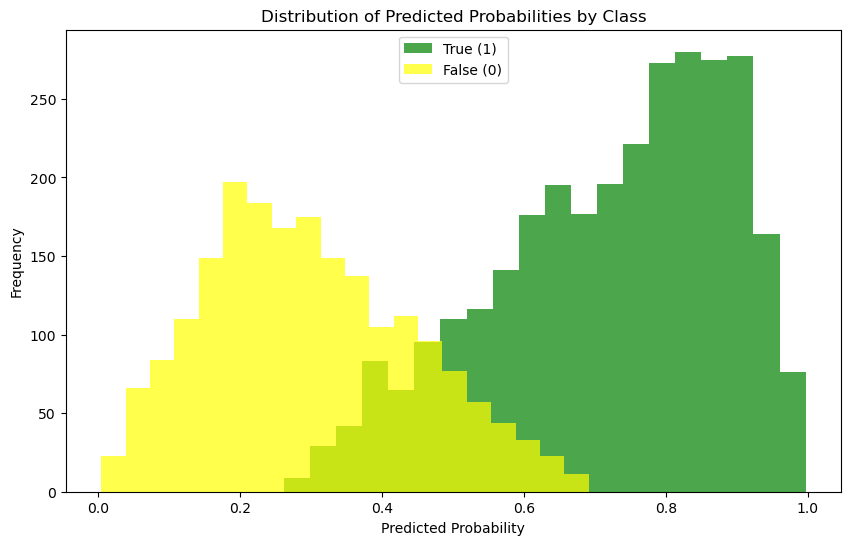

In [25]:
# Creating a histogram to show the distribution 
plt.figure(figsize=(10, 6))

# Plotting the values
plt.hist(results[results['actual'] == 1.0]['prob'], bins=20, alpha=0.7, label='True (1)', color='green')
plt.hist(results[results['actual'] == 0.0]['prob'], bins=20, alpha=0.7, label='False (0)', color='yellow')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities by Class')
plt.legend(loc='upper center')

plt.show()

# Comments 
1. Only True-  The values range from 0.6 to 1.0 - The predicted prbability for 1 is higher when compared to Falsae
2. Only False - Though some of the area is mixed. Only False can be taken from  0 to 0.3. This shows that occurence of false has been assigned lower probability.
3. Mixed area - Overlapping area can be considered from 0.3 to 0.7 This shows that the distinction is less clear for this area and mistakes can be made in this probability range. False positives or  false negatives

Conclusion- The Histogram shows slightly more inclination towards the positive response when compared to the negative one as shown above in the bias evaluation 

## Question 3
- Create a simple confusion matrix. Use `0.5` as the threshold for whether an observation should be considered True or False.  
- Comment on what you observe.

In [29]:
from sklearn.metrics import confusion_matrix

results['predicted'] = np.where(results['prob'] >= 0.5, 1, 0)
# Creating a confusion matrix for actual and 
cm = confusion_matrix(results['actual'], results['predicted'])
cm

array([[1790,  210],
       [ 377, 2623]], dtype=int64)

The above confusion matrix shows that there are 
1. The True Negatives are  1790 where the value was negative and it actually predicted negative
2. The False positive are  210 where the value was negative and it actually predicted positive
3. The False Negatives are  377  where the value was positive and it actually predicted negative
4. The True Positives are  2623  where the value was positive and it actually predicted positive

The false negatives are more than false positives which suggests that some positve cases may be misinterpreted as negative cases 

The total correct predictions are 4143 and the incorrect predictions are 587 
which suggests that the model predicted with 87.5% accuracy 


## Question 4
- Calculate the accuracy, precision, and recall `without` using any pre-built functions.
- Which measure would you use if this was your model and why?

In [30]:
#acessing the values from the confusion matrix
TrueNegatives = cm[0, 0]  
FalsePositives= cm[0, 1]  
FalseNegatives= cm[1, 0]  
TruePositives= cm[1, 1]

In [31]:
# TP: True Positives, TN: True Negatives FP: False Positives  FN: False Negatives 
#Formula for accuracy (TP+TN)/(TP+TN+FP+FN)
accuracy = (TruePositives + TrueNegatives) / (TruePositives + TrueNegatives + FalsePositives + FalseNegatives)
print(f"accuracy = {accuracy}")

#Formula for Precision = TP/(TP + FP)
precision = TruePositives / (TruePositives + FalsePositives)
print(f"precision = {precision}")

# the formula for recall is Recall = TP/(TP + FN)
recall = TruePositives / (TruePositives + FalseNegatives)
print(f"recall = {recall}")


accuracy = 0.8826
precision = 0.9258736321920226
recall = 0.8743333333333333


# Comments:
if only the above values are to be considered then
The recall value is preferable for the above model because the false negatives are more than false positive. Recall directly addresses this issue by letting us know how many of the actual positive cases the model was able to predict correctly.
If the recall value is low, it indicates that too many positive cases are slipping through as false negatives, which can be problematic.


I would also consider The F1 score that is the harmonic mean of precision and recall, providing a balanced measure when both false positives and false negatives are important. It is especially useful in cases with class imbalance or when there is a need to optimize both precision and recall.


## Question 5
- Construct a ROC curve plot.  
- Comment on the fit of the model based on this chart.

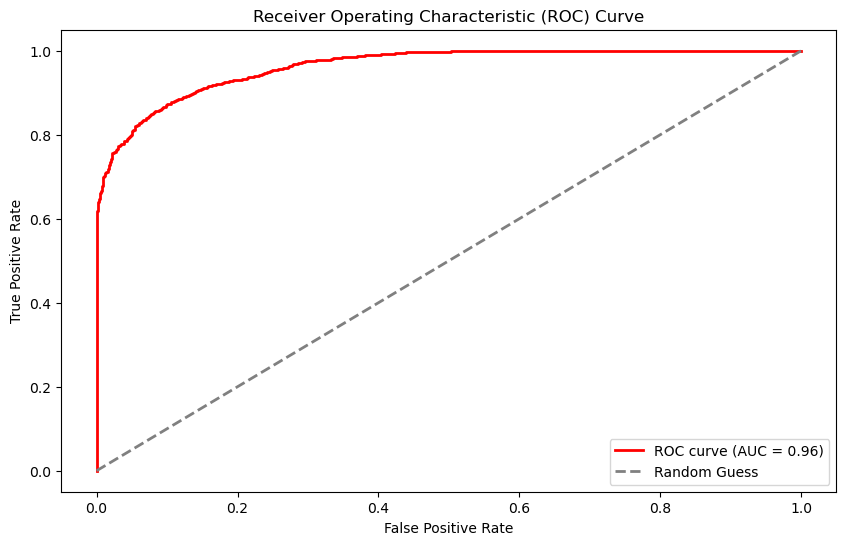

In [24]:
from sklearn.metrics import roc_curve, auc

# Calculating the false positive rate and true positive rate for different thresholds 
fpr, tpr, thresholds = roc_curve(results['actual'], results['prob'])

#Area Under the Curve (AUC) for false positive rate and true positive rate
roc_auc = auc(fpr, tpr)

# Ploting the  ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')

# Plotting the a random classifier line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.show()


# Comments
1. The diagonal line is the random guessing line. The ROC curve performs better than random guessing 
2. The curve rises quickly towards the left which is sign of a good model as it is tracing the vertical path of true positive rate. The model gets a high true positive rate with small increase in false positive
3. The model is a well fit but there is still room for improvement on false negativess 